The following notebook contains the code for the post-processing of the data using PyFluent Visualization for the flow over cylinder at Re - 500.

In [1]:
import ansys.fluent.core as pyfluent

from ansys.fluent.visualization import set_config
from ansys.fluent.visualization.matplotlib import Plots
from ansys.fluent.visualization.pyvista import Graphics

set_config(blocking = True, set_view_on_display = "isometric")
%matplotlib notebook

Starting the solver_session

In [2]:
solver_session = pyfluent.launch_fluent (precision = "double", processor_count = 4, mode = "solver", show_gui = True)

pyfluent.launcher WARNING: PyFluent Watchdog did not initialize correctly, proceeding without it...


Reading the case file generated by the fluent solver

In [3]:
solver_session.file.read_case_data(file_name = "Project_4_FlowCylinder_Re500.cas.h5")

Fast-loading "D:\softwares\ANSYS Inc\ANSYS Student\v231\fluent\fluent23.1.0\\addons\afd\lib\hdfio.bin"
Done.
Multicore SMT processors detected. Processor affinity set!

Reading from MSI:"D:\McGill_MSc Thesis\coursera\ANSYS_pyScript\week_4_Flow over cylinder\Project_4_FlowCylinder_Re500.cas.h5" in NODE0 mode ...
  Reading mesh ...
      286713 cells,     1 cell zone  ...
         286713 polyhedra cells,  zone id: 606
     1832703 faces,     9 face zones ...
        1744916 polygonal interior faces,  zone id: 605
            780 polygonal wall faces,  zone id: 65
            781 polygonal wall faces,  zone id: 66
            406 polygonal wall faces,  zone id: 63
            406 polygonal wall faces,  zone id: 64
          42292 polygonal symmetry faces,  zone id: 62
          42166 polygonal symmetry faces,  zone id: 61
            478 polygonal pressure-outlet faces,  zone id: 60
            478 polygonal velocity-inlet faces,  zone id: 59
     1556292 nodes,     1 node zone  ...
  Don

'*cx-overwrite-prompt?*'

Graphics object for the solver session from PyVista library

In [4]:
graphics = Graphics(solver_session)

Displaying mesh using the graphics object

In [5]:
mesh = graphics.Meshes["Mesh"]

In [6]:
mesh()

{'surfaces_list': None,
 'show_edges': False,
 'show_nodes': False,
 'show_faces': True}

In [8]:
mesh.surfaces_list = ["inlet", "outlet", "cylinder_upper", "cylinder_lower", "symmetry_right", "symmetry_left"]
mesh.show_edges = True

In [9]:
mesh()

{'surfaces_list': ['inlet',
  'outlet',
  'cylinder_upper',
  'cylinder_lower',
  'symmetry_right',
  'symmetry_left'],
 'show_edges': True,
 'show_nodes': False,
 'show_faces': True}

C:\Program Files\Python310\lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

cannot import name 'vtk' from 'trame.widgets' (C:\Users\NOTEBOOK\AppData\Roaming\Python\Python310\site-packages\trame\widgets\__init__.py)

Falling back to a static output.
  warnings.warn(


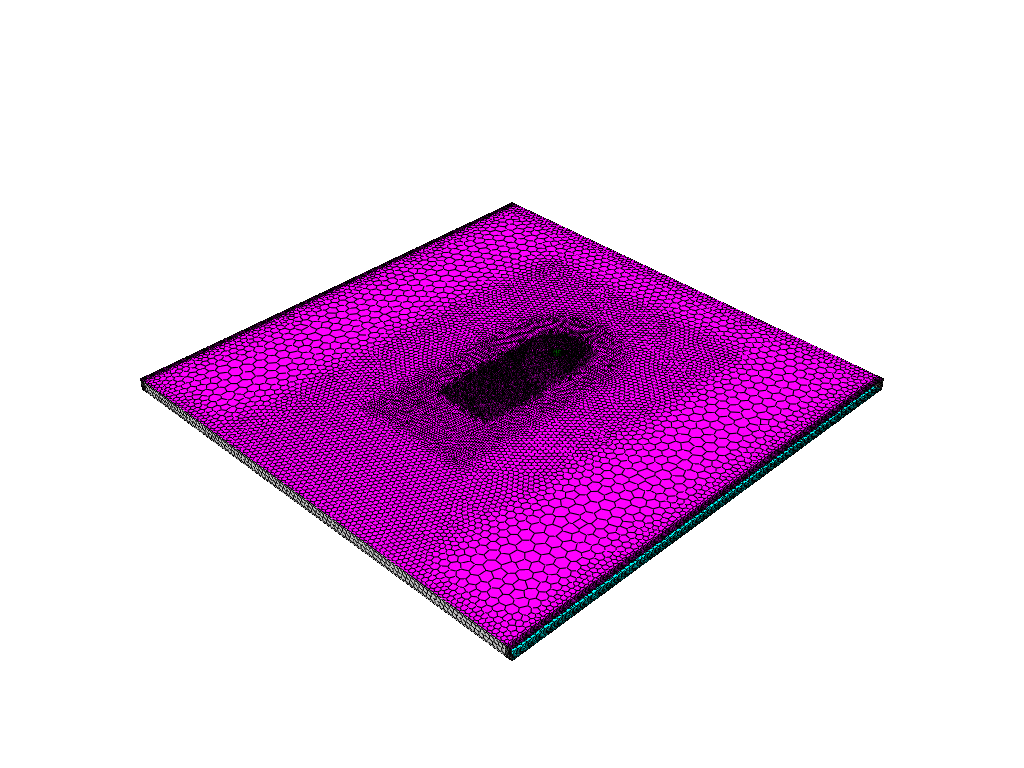

In [11]:
mesh.display()

Making a xy-plane at the middle section of the entire geometry

In [12]:
plane = graphics.Surfaces["xy-plane"]

In [13]:
plane()

{'show_edges': True,
 'definition': {'type': 'iso-surface',
  'iso_surface': {'field': None, 'rendering': 'mesh', 'iso_value': None}}}

In [14]:
plane.definition.type.allowed_values

['plane-surface', 'iso-surface']

In [15]:
plane.definition.type = "plane-surface"

In [16]:
plane()

{'show_edges': True,
 'definition': {'type': 'plane-surface',
  'plane_surface': {'creation_method': 'xy-plane', 'xy_plane': {'z': 0}}}}

In [18]:
plane.definition.plane_surface.xy_plane.z = 0.005

Displaying the Velocity-contour in xy plane

In [19]:
vel_cont = graphics.Contours["vel-contour"]

C:\Program Files\Python310\lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

cannot import name 'vtk' from 'trame.widgets' (C:\Users\NOTEBOOK\AppData\Roaming\Python\Python310\site-packages\trame\widgets\__init__.py)

Falling back to a static output.
  warnings.warn(


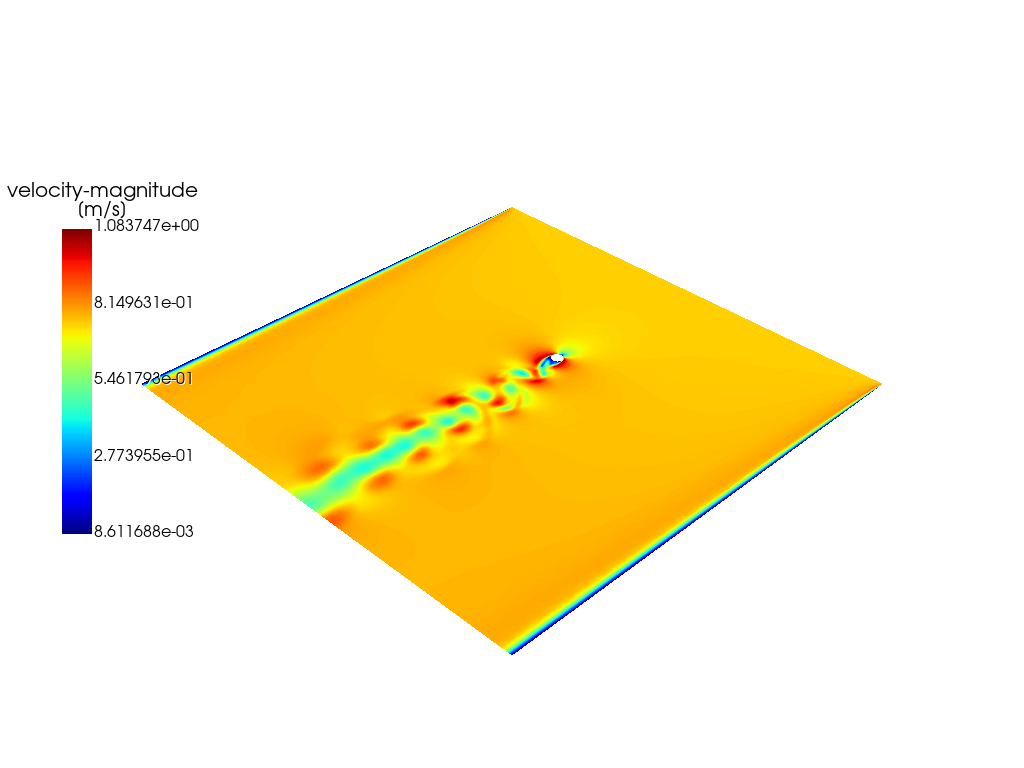

In [20]:
vel_cont.field = "velocity-magnitude"
vel_cont.surfaces_list = ["xy-plane"]
vel_cont.display()

Displaying the Pressure-contour in xy plane

C:\Program Files\Python310\lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

cannot import name 'vtk' from 'trame.widgets' (C:\Users\NOTEBOOK\AppData\Roaming\Python\Python310\site-packages\trame\widgets\__init__.py)

Falling back to a static output.
  warnings.warn(


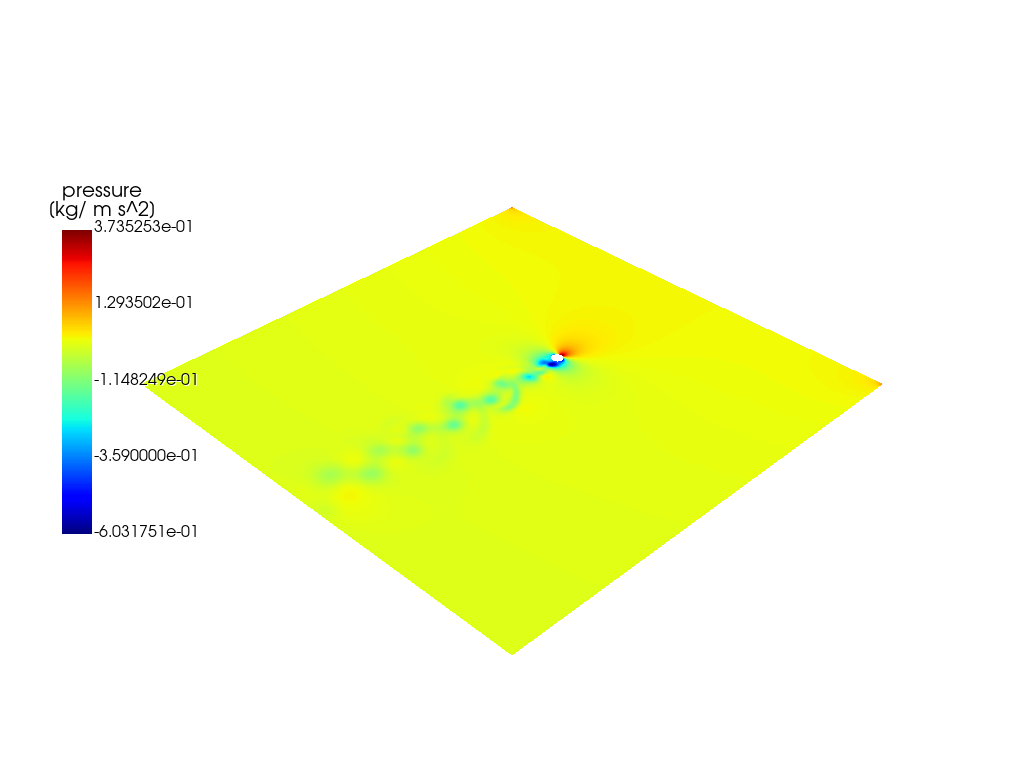


Posting ANSYS Product Improvement Program performance data 
Done.
Shutting down Server...


In [21]:
pressure_cont = graphics.Contours["pressure-contour"]
pressure_cont.field = "pressure"
pressure_cont.surfaces_list = ["xy-plane"]
pressure_cont.display()